# Mengimport library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
# plt.style.use('seaborn-whitegrid')

# Memuat data mentah

In [22]:
# mengambil data jakarta
# data_jakarta = pd.read_csv('data_mentah_jakarta.csv')

# # memilih kolum pm_10, pm_duakomalima, so2, co, o3, no2
# columns_jakarta2 = ["pm_10", "pm_duakomalima", "so2", "co", "o3", "no2", "categori"]
# data_jakarta = data_jakarta[columns_jakarta2]

# # merubah nama kolum ke pm10, pm2_5, so2, co, o3, no2, kualitas
# data_jakarta.columns = ["pm10", "pm2_5", "so2", "co", "o3", "no2", "kualitas"]

# # save ke csv files
# data_jakarta.to_csv('data_jakarta.csv', index=False)

# mengambil data jakarta
data_jakarta = pd.read_csv('data_jakarta.csv')
columns = data_jakarta.columns
display(
  data_jakarta.head(),
  columns
)

,pm10,pm2_5,so2,co,o3,no2,kualitas
0,54,73,56,24,23,24,SEDANG
1,40,64,57,21,17,24,SEDANG
2,75,129,45,25,71,26,TIDAK SEHAT
3,66,110,47,16,61,23,TIDAK SEHAT
4,56,78,49,11,60,13,SEDANG


Index(['pm10', 'pm2_5', 'so2', 'co', 'o3', 'no2', 'kualitas'], dtype='object')

# Menyesuaikan data
Agar sesuai dengan perhitungan kombinasi SVM dan KNN

In [23]:
# menentukan data
# data = pd.concat([data_jakarta.iloc[:, 1], data_jakarta.iloc[:, 4]], axis=1)

# menentukan label kelas
kelas ={'BAIK' : 1, 'SEDANG' : 1, 'TIDAK SEHAT' : 2}

data_mentah = data_jakarta.copy()

# menambahkan kolum yang bernama kelas atau 'class'
data_mentah['kualitas'] = data_mentah['kualitas'].map(kelas)


# Normalisasi Data

In [28]:
# data normalization
scaler = MinMaxScaler()
data = scaler.fit_transform(data_mentah)

pd_normalized = pd.DataFrame(data, columns=columns)
pd_normalized.to_csv('pd_normalized.csv', index=False)

data_mentah.describe().to_csv('data_mentah_describe.csv')
pd_normalized.describe().to_csv('pd_normalized_describe.csv')

# describe data
display(
  data_mentah.describe(),
  pd_normalized.describe()
)

,pm10,pm2_5,so2,co,o3,no2,kualitas
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,59.819178,92.939726,47.926027,18.424658,57.243836,28.753425,1.375342
std,13.330135,24.421363,4.569669,7.097666,23.345547,8.677337,0.484876
min,23.000000,40.000000,37.000000,7.000000,15.000000,6.000000,1.000000
25%,52.000000,75.000000,44.000000,14.000000,39.000000,23.000000,1.000000
50%,60.000000,92.000000,49.000000,17.000000,54.000000,28.000000,1.000000
75%,68.000000,111.000000,51.000000,21.000000,71.000000,34.000000,2.000000
max,95.000000,165.000000,62.000000,55.000000,181.000000,52.000000,2.000000


,pm10,pm2_5,so2,co,o3,no2,kualitas
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.511377,0.423518,0.437041,0.238014,0.254481,0.494640,0.375342
std,0.185141,0.195371,0.182787,0.147868,0.140636,0.188638,0.484876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402778,0.280000,0.280000,0.145833,0.144578,0.369565,0.000000
50%,0.513889,0.416000,0.480000,0.208333,0.234940,0.478261,0.000000
75%,0.625000,0.568000,0.560000,0.291667,0.337349,0.608696,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Splitting

In [ ]:
x = data_jakarta.values
y = data_jakarta.iloc[:, 7:].values

#pemecahan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(len(X_train))
print(len(X_test))

# Visualisasi persebaran data 2D

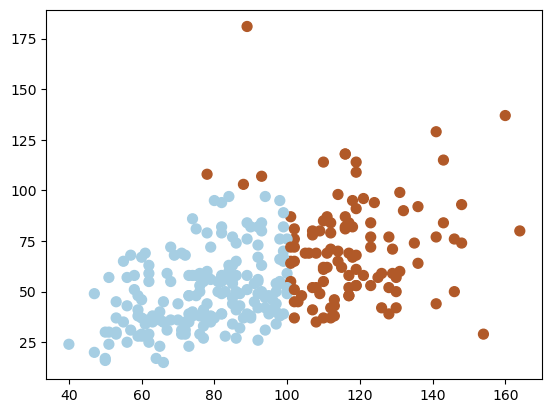

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=plt.cm.Paired);

# Membuat model klasifikasi SVM/SVC tanpa prediction

In [6]:
#pemilihan metode dan tipe kernel yang digunakan
model = SVC(kernel='linear')
model.fit(x, y)

/home/ubaid/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Visualisasi pembagian area secara linear

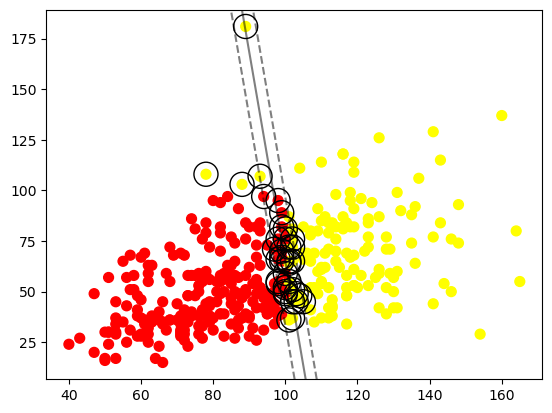

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# Menghitung persamaan menggunakan hyperlane
agar mendapatkan variabel m dan c dalam persamaan y = mx + c

In [8]:
def get_hyperplane_equation(clf):
  """
  This function extracts the equation of the separating hyperplane
  from a trained linear SVM classifier (`clf`) in the form y = mx + c.

  Args:
      clf: A trained linear SVM classifier object.

  Returns:
      A tuple containing the slope (m) and y-intercept (c) of the hyperplane.

  Raises:
      ValueError: If the classifier is not a linear SVM.
  """

  if not hasattr(clf, 'coef_') or not hasattr(clf, 'intercept_'):
    raise ValueError("Classifier object does not appear to be a linear SVM.")

  w = clf.coef_[0]
  if w[1] == 0:
    raise ValueError("Slope cannot be determined if w[1] is zero.")

  a = -w[0] / w[1]  # Slope (m)
  b = clf.intercept_[0]  # Bias term
  c = -b / w[1]        # Y-intercept (c)

  return a, c

# Example usage (assuming you have a trained linear SVM classifier named 'clf')
try:
  m, c = get_hyperplane_equation(model)
  print(f"The equation of the separating hyperplane is y = {m:.4f}x + {c:.4f}")
except ValueError as e:
  print(f"Error: {e}")

The equation of the separating hyperplane is y = -10.3333x + 1098.3310


# Menghitung jarak antara garis dan titik, dan menghitung akurasi
referensi rumus buku matematika SMP  
jika nilai jarak bernilai negatif, maka titik berada di sisi kanan garis alias **'TIDAK SEHAT'**.  
jika nilai jarak bernilai positif, maka titik berada di sisi kiri garis alias **'NORMAL'**.

In [9]:
def distance_to_line(point, m, c):
  """
  Menghitung jarak antara titik (x0, y0) ke garis y = mx + c.

  Args:
    point (tuple): Koordinat titik (x0, y0).
    m (float): Gradien garis.
    c (float): Bias garis.

  Returns:
    float: Jarak antara titik dan garis.
  """
  x0, y0 = point

  # Menghitung jarak tegak lurus dari titik ke garis
  perpendicular_distance = y0 - (m * x0 + c) / np.sqrt(1 + m**2)

  return perpendicular_distance

# Data titik
data_points = X_test

predicted = np.array([])
# Looping dengan enumerate
for index, point in enumerate(data_points):
  distance = distance_to_line(point, m, c)

  # if distance is positive then 1, if negative then 2
  new_values = np.where(distance >= 0, 1, 2)
  predicted = np.append(predicted, new_values)

  print(f"Jarak titik ke-{index+1} ({point}) ke garis: {distance:.2f}")

print(predicted)

# Menghitung akurasi
correct = 0
for i in range(len(y_test)):
  if y_test[i] == predicted[i]:
    correct += 1

accuracy = correct / len(y_test) * 100
print(f"Akurasi: {accuracy:.2f}%")

Jarak titik ke-1 ([101  36]) ke garis: 30.73
Jarak titik ke-2 ([114  76]) ke garis: 83.67
Jarak titik ke-3 ([83 39]) ke garis: 15.82
Jarak titik ke-4 ([77 76]) ke garis: 46.85
Jarak titik ke-5 ([93 52]) ke garis: 38.77
Jarak titik ke-6 ([87 91]) ke garis: 71.80
Jarak titik ke-7 ([98 40]) ke garis: 31.75
Jarak titik ke-8 ([128  71]) ke garis: 92.61
Jarak titik ke-9 ([53 34]) ke garis: -19.04
Jarak titik ke-10 ([137 106]) ke garis: 136.57
Jarak titik ke-11 ([72 26]) ke garis: -8.13
Jarak titik ke-12 ([71 28]) ke garis: -7.13
Jarak titik ke-13 ([100  81]) ke garis: 74.74
Jarak titik ke-14 ([104 111]) ke garis: 108.72
Jarak titik ke-15 ([126  61]) ke garis: 80.62
Jarak titik ke-16 ([83 59]) ke garis: 35.82
Jarak titik ke-17 ([87 57]) ke garis: 37.80
Jarak titik ke-18 ([89 49]) ke garis: 31.79
Jarak titik ke-19 ([109  60]) ke garis: 62.70
Jarak titik ke-20 ([62 32]) ke garis: -12.08
Jarak titik ke-21 ([71 30]) ke garis: -5.13
Jarak titik ke-22 ([57 51]) ke garis: 1.94
Jarak titik ke-23 ([72

# Bagaimana jika menggunakan 6 features

In [10]:
# load file
df = pd.read_csv('data_jakarta.csv')
df

,pm10,pm2_5,so2,co,o3,no2,kualitas
0,54,73,56,24,23,24,SEDANG
1,40,64,57,21,17,24,SEDANG
2,75,129,45,25,71,26,TIDAK SEHAT
3,66,110,47,16,61,23,TIDAK SEHAT
4,56,78,49,11,60,13,SEDANG
...,...,...,...,...,...,...,...
360,66,112,47,15,84,29,TIDAK SEHAT
361,63,93,47,13,84,19,SEDANG
362,61,93,48,13,107,25,TIDAK SEHAT
363,55,80,48,17,95,25,SEDANG


# Pemeriksaan

In [11]:
df.value_counts()

pm10  pm2_5  so2  co  o3   no2  kualitas   
23    50     57   12  16   15   SEDANG         1
66    110    47   16  61   23   TIDAK SEHAT    1
      104    44   14  111  25   TIDAK SEHAT    1
      101    53   30  36   50   TIDAK SEHAT    1
             47   22  64   26   TIDAK SEHAT    1
                                              ..
55    79     49   15  38   21   SEDANG         1
      78     51   13  58   27   SEDANG         1
             48   17  108  25   TIDAK SEHAT    1
      77     52   17  41   29   SEDANG         1
95    165    53   18  55   32   TIDAK SEHAT    1
Name: count, Length: 365, dtype: int64

# Deskripsi data

In [12]:
df.describe()

,pm10,pm2_5,so2,co,o3,no2
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,59.819178,92.939726,47.926027,18.424658,57.243836,28.753425
std,13.330135,24.421363,4.569669,7.097666,23.345547,8.677337
min,23.000000,40.000000,37.000000,7.000000,15.000000,6.000000
25%,52.000000,75.000000,44.000000,14.000000,39.000000,23.000000
50%,60.000000,92.000000,49.000000,17.000000,54.000000,28.000000
75%,68.000000,111.000000,51.000000,21.000000,71.000000,34.000000
max,95.000000,165.000000,62.000000,55.000000,181.000000,52.000000


# Pemisahan data latih, data uji, fitur dan target

In [13]:
trainX, testX, trainY, testY = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# print all shape
print('trainX.shape', trainX.shape)
print('testX.shape', testX.shape)
print('trainY.shape', trainY.shape)
print('testY.shape', testY.shape)

trainX.shape (292, 6)
testX.shape (73, 6)
trainY.shape (292,)
testY.shape (73,)


# Pembuatan model

In [14]:
# create model
model = SVC(kernel='linear')
model.fit(trainX, trainY)

SVC(kernel='linear')

# Dapatkan koefisien (weights) dan intercept

In [15]:
# Dapatkan koefisien (weights) dan intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

In [19]:
# Tentukan titik pada hyperplane
point_A = np.zeros(6)
for i in range(5):
  point_A[i] = -coef[i] / coef[-1]
# point_A[-1] = -intercept / coef[-1]

print(point_A)

[-13.35234937  -5.90474502  -8.83302704 -11.01931207  -1.94516589
   0.        ]


In [20]:
# Vektor arah dari hyperplane adalah vektor normal
direction_vector = coef

In [21]:
def signed_distance_point_to_line_6d(point_B, point_A, direction_vector):
    """
    Calculate the signed distance between a point and a line in 6-dimensional space.

    Parameters:
    point_B (numpy array): The coordinates of the point B (6-dimensional).
    point_A (numpy array): The coordinates of a point on the line A (6-dimensional).
    direction_vector (numpy array): The direction vector of the line (6-dimensional).

    Returns:
    float: The signed distance between point B and the line defined by point A and direction_vector.
    """
    # Ensure inputs are numpy arrays
    point_B = np.array(point_B)
    point_A = np.array(point_A)
    direction_vector = np.array(direction_vector)

    # Calculate the vector from point A to point B
    vector_AB = point_B - point_A

    # Project vector_AB onto direction_vector to find the closest point on the line to point B
    projection_length = np.dot(vector_AB, direction_vector) / np.dot(direction_vector, direction_vector)
    projection_vector = projection_length * direction_vector

    # Calculate the vector from point B to the closest point on the line
    closest_vector = vector_AB - projection_vector

    # The signed distance is the dot product of closest_vector with direction_vector, divided by the magnitude of direction_vector
    signed_distance = np.dot(closest_vector, direction_vector) / np.linalg.norm(direction_vector)

    return signed_distance


In [22]:
# Hitung jarak
distance_B1 = signed_distance_point_to_line_6d(trainX.iloc[0], point_A, direction_vector)
distance_B2 = signed_distance_point_to_line_6d(trainX.iloc[1], point_A, direction_vector)
distance_B3 = signed_distance_point_to_line_6d(trainX.iloc[2], point_A, direction_vector)

print('distance_B1', distance_B1)
print('class_B1', trainY.iloc[0])
print('distance_B2', distance_B2)
print('class_B2', trainY.iloc[1])
print('distance_B3', distance_B3)
print('class_B3', trainY.iloc[2])

distance_B1 2.7967048963251855e-15
class_B1 SEDANG
distance_B2 -4.994115886294974e-15
class_B2 TIDAK SEHAT
distance_B3 1.0387761043493546e-14
class_B3 SEDANG


In [23]:
# make looping to predict using signed_distance_point_to_line_6d() as KNN model
predicted = np.array([])
for i in range(len(testX)):
  distance_B = signed_distance_point_to_line_6d(testX.iloc[i], point_A, direction_vector)

  if distance_B <= 0:
    predicted = np.append(predicted, 1)
  else:
    predicted = np.append(predicted, 2)

  print(f'distance_B{i+1}: {distance_B}')
  print(f'class_B{i+1}: {testY.iloc[i]}')

distance_B1: 1.5981170836143918e-14
class_B1: SEDANG
distance_B2: -1.4782583023433123e-14
class_B2: TIDAK SEHAT
distance_B3: -3.9952927090359794e-15
class_B3: TIDAK SEHAT
distance_B4: -3.1962341672287836e-15
class_B4: TIDAK SEHAT
distance_B5: 1.178611349165614e-14
class_B5: SEDANG
distance_B6: 3.9952927090359794e-15
class_B6: TIDAK SEHAT
distance_B7: 3.9952927090359794e-15
class_B7: SEDANG
distance_B8: -5.593409792650371e-15
class_B8: SEDANG
distance_B9: 7.990585418071959e-15
class_B9: SEDANG
distance_B10: -3.1962341672287836e-15
class_B10: SEDANG
distance_B11: 1.198587812710794e-15
class_B11: SEDANG
distance_B12: -4.794351250843176e-15
class_B12: TIDAK SEHAT
distance_B13: 1.1985878127107938e-14
class_B13: TIDAK SEHAT
distance_B14: -9.189173230782752e-15
class_B14: TIDAK SEHAT
distance_B15: -6.392468334457567e-15
class_B15: SEDANG
distance_B16: -6.392468334457567e-15
class_B16: SEDANG
distance_B17: -6.192703699005768e-15
class_B17: SEDANG
distance_B18: -1.5981170836143918e-15
class_B18

In [24]:
# accuration
from sklearn.metrics import accuracy_score

# testY map 'SEDANG' as 1 and 'TIDAK SEHAT' as 2
testYmap = testY.map({'BAIK': 1, 'SEDANG': 1, 'TIDAK SEHAT': 2})

accuracy = accuracy_score(testYmap, predicted)
print('Accuracy:', accuracy)

Accuracy: 0.5616438356164384


In [22]:
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load data
data = pd.read_csv('data_jakarta.csv')

# select features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Misalnya, titik di mana x1, x2, x3, x4, dan x5 = 0, kita bisa menghitung x6
# x6 = -(coef[0]*x1 + coef[1]*x2 + coef[2]*x3 + coef[3]*x4 + coef[4]*x5 + intercept) / coef[5]
# map 'SEDANG' to 1 and 'TIDAK SEHAT' to 2
y = y.map({'BAIK': 1, 'SEDANG': 1, 'TIDAK SEHAT': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM to find support vectors
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Get support vectors
support_vectors = svm.support_vectors_

# Get labels of support vectors
support_vector_labels = [y_train[i] for i in svm.support_]

# Train KNN using support vectors
k = 3  # You can choose another value for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(support_vectors, support_vector_labels)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


KeyError: 45

In [ ]:
svm.support_

In [ ]:
y[45]